In [175]:
from PIL import Image
import numpy as np

image = Image.open(r"C:\Users\Acer\Desktop\github\aitu_hackday_rid\data\072922.tiff")
img_array = np.array(image)
array = np.array(image)
print(array.shape)
array

(596, 1456, 4)


array([[[ 81,  66,  47, 255],
        [ 82,  67,  48, 255],
        [ 83,  68,  49, 255],
        ...,
        [ 41,  53,  33, 255],
        [ 39,  52,  34, 255],
        [ 38,  51,  33, 255]],

       [[ 81,  66,  47, 255],
        [ 82,  67,  48, 255],
        [ 83,  68,  49, 255],
        ...,
        [ 42,  54,  34, 255],
        [ 43,  54,  37, 255],
        [ 45,  56,  39, 255]],

       [[ 82,  67,  48, 255],
        [ 83,  68,  49, 255],
        [ 83,  68,  49, 255],
        ...,
        [ 43,  50,  32, 255],
        [ 47,  54,  36, 255],
        [ 51,  60,  41, 255]],

       ...,

       [[104,  80,  54, 255],
        [106,  82,  56, 255],
        [103,  79,  55, 255],
        ...,
        [ 87,  72,  53, 255],
        [ 86,  71,  52, 255],
        [ 85,  70,  51, 255]],

       [[102,  78,  52, 255],
        [105,  81,  55, 255],
        [104,  80,  56, 255],
        ...,
        [ 86,  71,  52, 255],
        [ 86,  71,  52, 255],
        [ 85,  70,  51, 255]],

       [[ 99

In [176]:
array = array.reshape((-1, 4))
array = np.float32(array)

In [178]:
import pandas as pd

df = pd.DataFrame(array).drop(3, axis=1)
array = df.to_numpy()

In [179]:
import cv2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            100, 1.0)

In [183]:
k = 4
retval, labels, centers = cv2.kmeans(array, k, None, criteria,
                                     10, cv2.KMEANS_RANDOM_CENTERS)

In [184]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

In [185]:
segmented_image = segmented_data.reshape((596, 1456, 3))

In [186]:
import matplotlib.pyplot as plt

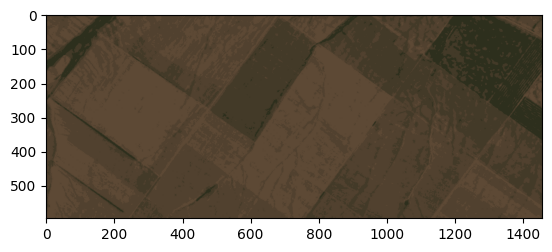

In [187]:
plt.imshow(segmented_image)

In [188]:
labeled_image = labels.reshape((596, 1456))

In [192]:
labeled_image

array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 2],
       ...,
       [3, 3, 3, ..., 3, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1]], dtype=int32)

In [191]:
labeled_image[labeled_image==0]=4

In [193]:
pd.DataFrame(labeled_image)

,0,1,2,3,4,5,6,7,8,9,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
0,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
1,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
2,1,1,1,1,1,1,1,1,1,1,...,2,2,2,4,4,4,4,4,4,2
3,1,1,1,1,1,1,1,1,1,1,...,2,2,2,4,4,4,4,4,4,2
4,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,1,1,1,1,1,1
592,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,1,1
593,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,1,3,1,1
594,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,1,1,1,1,1


In [165]:
segmented_image[np.all(segmented_image == (82, 66, 47), axis=-1)] = (255, 0, 0)

In [166]:
segmented_image[np.all(segmented_image == centers[1], axis=-1)] = (0, 255, 0)

In [167]:
segmented_image[np.all(segmented_image == centers[2], axis=-1)] = (255, 255, 0)

In [168]:
segmented_image[np.all(segmented_image == centers[3], axis=-1)] = (105, 105, 105)

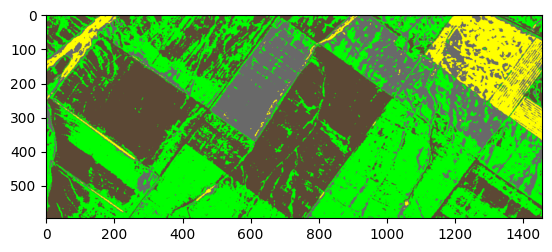

In [169]:
plt.imshow(segmented_image)